In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from Functions.visualization_functions import *

In [2]:
# TODO change the path to the csv files
# Runs to compare
df_ppo = pd.read_csv('Data/2024-12-03_environment_data_PPO.csv')
df_a2c = pd.read_csv('Data/2024-12-03_environment_data_A2C.csv')
df_ddpg = pd.read_csv('Data/2024-12-03_environment_data_DDPG.csv')
# df_heuristic = pd.read_csv('heuristic.csv')
# df_greedy = pd.read_csv('greedy.csv')
df_fixed = pd.read_csv('Data/2024-12-03_environment_data_fixed_order.csv')

# Dataframes to compare
df_rl = [df_ppo, df_a2c, df_ddpg]
# df_all = [df_ppo, df_a2c, df_ddpg, df_heuristic, df_greedy]
df_all = [df_ppo, df_a2c, df_ddpg, df_fixed]

# df_list = [df_ppo, df_fixed]
# label = ['PPO', 'Fixed']

# Labels for the plots
label_rl = ['PPO', 'A2C', 'DDPG']
# labels_al = ['PPO', 'A2C', 'DDPG', 'Heuristic', 'Greedy']
labels_all = ['PPO', 'A2C', 'DDPG', 'Fixed']

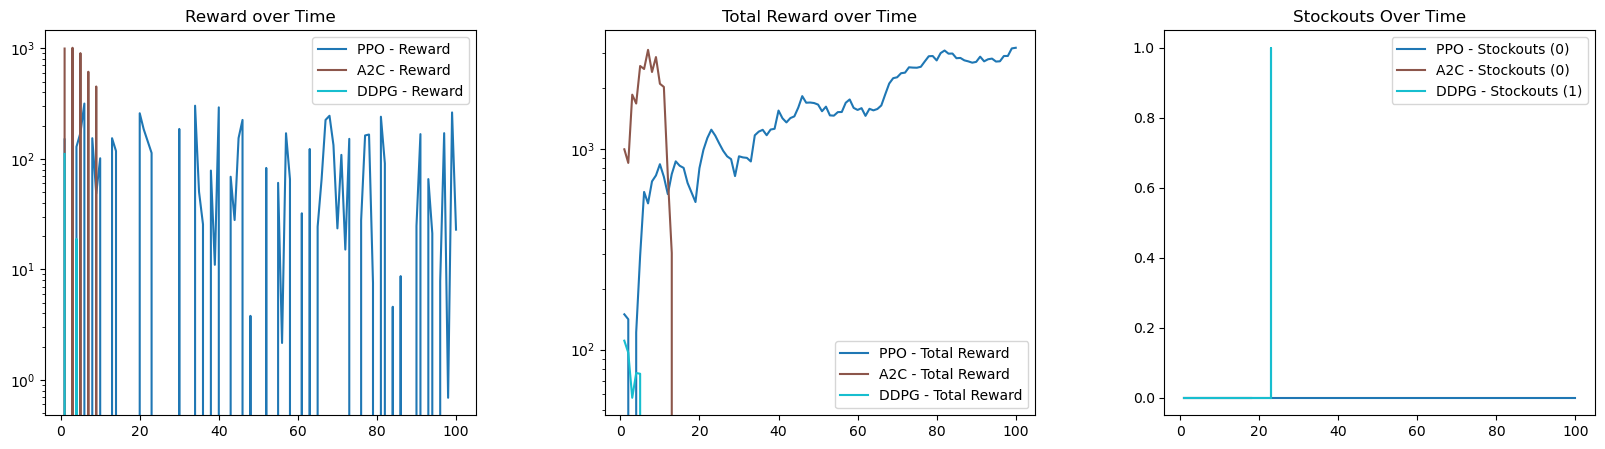

In [3]:
benchmark_plot(df_rl, label_rl)

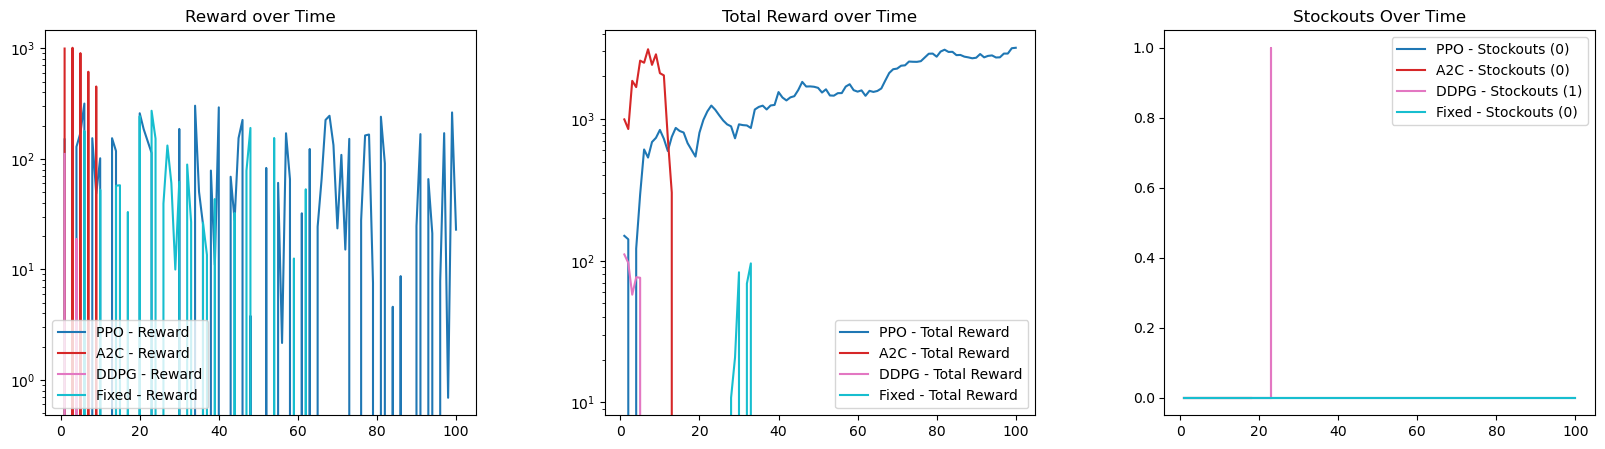

In [4]:
benchmark_plot(df_all, labels_all)

Safety Stock Levels